In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df_appl = pd.read_csv('aapl.us.csv')
df_ggl = pd.read_csv('googl.csv')
df_msft = pd.read_csv('msft.csv')

Text(0, 0.5, 'Close Price')

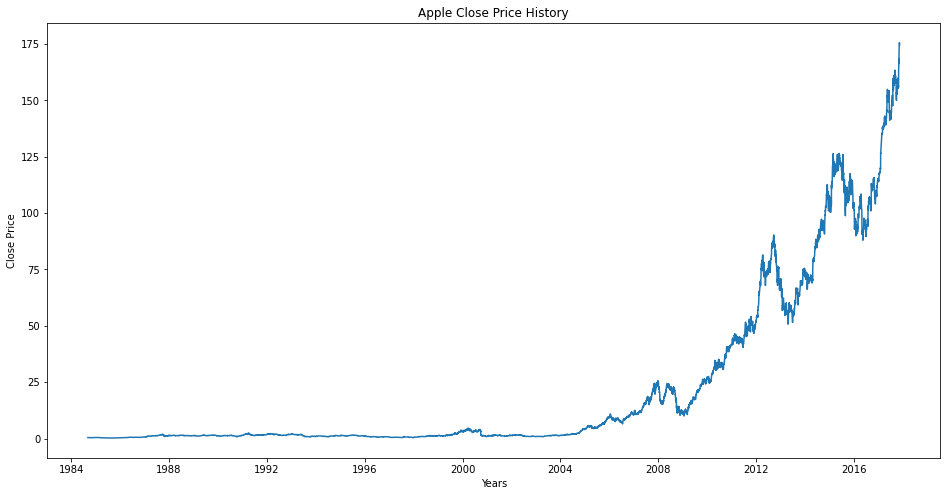

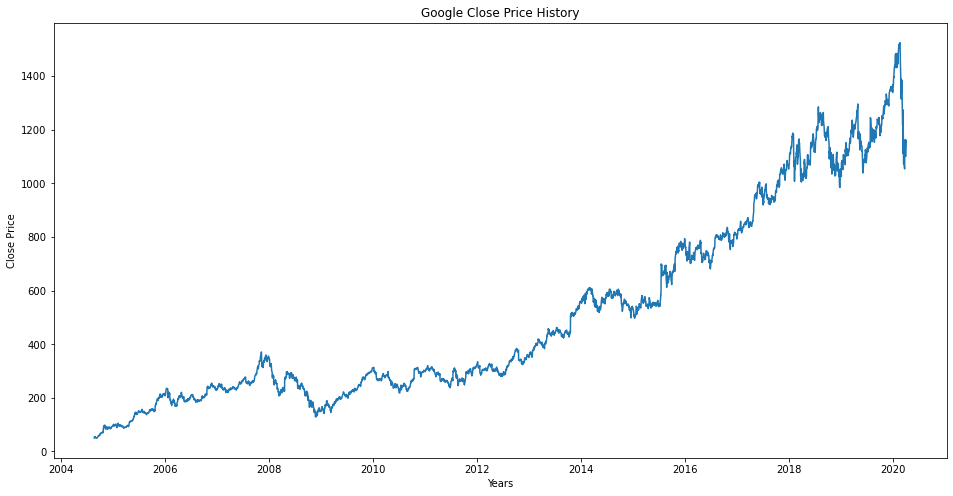

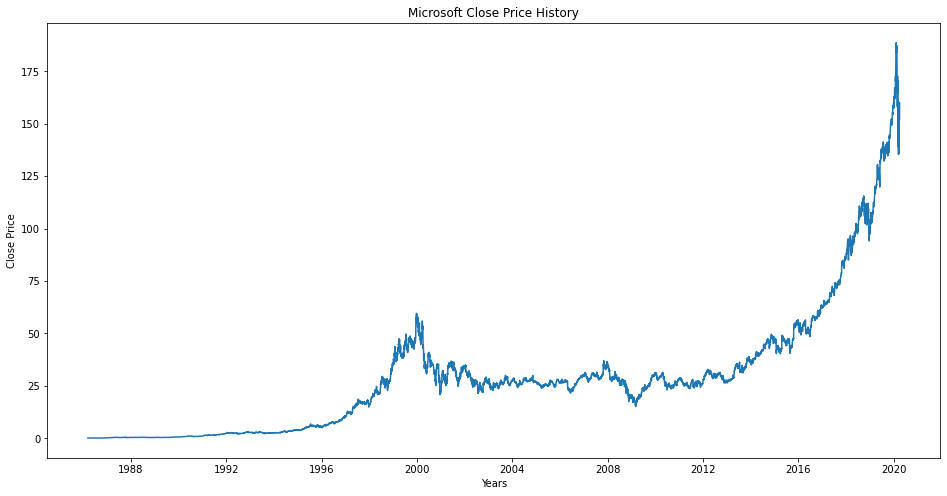

In [25]:
# apple
df_appl['Date'] = pd.to_datetime(df_appl.Date,format='%Y-%m-%d')
df_appl.index = df_appl['Date']
plt.figure(figsize=(16,8))
plt.plot(df_appl['Close'])
plt.title("Apple Close Price History")
plt.xlabel("Years")
plt.ylabel("Close Price")

# google
df_ggl['Date'] = pd.to_datetime(df_ggl.Date,format='%Y-%m-%d')
df_ggl.index = df_ggl['Date']
plt.figure(figsize=(16,8))
plt.plot(df_ggl['Close'])
plt.title("Google Close Price History")
plt.xlabel("Years")
plt.ylabel("Close Price")

# microsoft
df_msft['Date'] = pd.to_datetime(df_msft.Date,format='%Y-%m-%d')
df_msft.index = df_msft['Date']
plt.figure(figsize=(16,8))
plt.plot(df_msft['Close'])
plt.title("Microsoft Close Price History")
plt.xlabel("Years")
plt.ylabel("Close Price")

In [26]:
df_appl = df_appl[(df_appl['Date'] >= '2005-01-01')]
df_msft = df_msft[(df_msft['Date'] >= '1998-01-01')]
df_appl

,Date,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,,
2005-01-03,2005-01-03,4.1529,4.1685,4.0083,4.0519,193279926,0
2005-01-04,2005-01-04,4.0825,4.1915,4.0314,4.0940,306165093,0
2005-01-05,2005-01-05,4.0940,4.1775,4.0940,4.1300,189804833,0
2005-01-06,2005-01-06,4.1491,4.1556,4.0545,4.1324,196766476,0
2005-01-07,2005-01-07,4.1646,4.4578,4.1469,4.4336,623374174,0
...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,171.7500,174.3600,171.1000,173.6300,34901241,0
2017-11-07,2017-11-07,173.2900,174.5100,173.2900,174.1800,24424877,0
2017-11-08,2017-11-08,174.0300,175.6100,173.7100,175.6100,24451166,0


In [13]:
# weekly data, 5 to 1, close price and volume

df_appl_week = df_appl.groupby(np.arange(len(df_appl))//5).mean()
df_ggl_week = df_ggl.groupby(np.arange(len(df_ggl))//5).mean()
df_msft_week = df_msft.groupby(np.arange(len(df_msft))//5).mean()

In [14]:
def split(filename, n):
    df = pd.read_csv(filename)
    train_size = round(len(df)*0.7)
    y_movement = df['movement']
    y_t = df['Close (t)']

    if n == 1:
        t_n = ['t-1']
    else:
        t_n = ['Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)',\
                   'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
    X = df[t_n]

    # for movement
    X_train, X_test, y_train_movement, y_test_movement = X[:train_size], X[train_size:], y_movement[:train_size], y_movement[train_size:]

    # for t
    X_train, X_test, y_train_t, y_test_t = X[:train_size], X[train_size:], y_t[:train_size], y_t[train_size:]
    train_df = pd.concat([X_train,y_train_t,y_train_movement],axis = 1)
    test_df = pd.concat([X_test,y_test_t, y_test_movement],axis = 1)
    return train_df, test_df

In [15]:
# apple

df_apple = pd.DataFrame()

# volume
df_apple['Volume (t-5)'] = df_appl_week['Volume']
df_apple['Volume (t-4)'] = df_appl_week['Volume'].shift(-1)
df_apple['Volume (t-3)'] = df_appl_week['Volume'].shift(-2)
df_apple['Volume (t-2)'] = df_appl_week['Volume'].shift(-3)
df_apple['Volume (t-1)'] = df_appl_week['Volume'].shift(-4)

# close price
df_apple['Close (t-5)'] = df_appl_week['Close']
df_apple['Close (t-4)'] = df_appl_week['Close'].shift(-1)
df_apple['Close (t-3)'] = df_appl_week['Close'].shift(-2)
df_apple['Close (t-2)'] = df_appl_week['Close'].shift(-3)
df_apple['Close (t-1)'] = df_appl_week['Close'].shift(-4)

# y-variable (close price)
df_apple['Close (t)'] = df_appl_week['Close'].shift(-5)
df_apple = df_apple.dropna()

# y-variable (movement)
df_apple['movement'] = np.where(df_apple["Close (t)"] > df_apple['Close (t-1)'], 1, 0)
df_apple.to_csv('df_apple.csv')

train, test = split('df_apple.csv', 5)
train.to_csv('train_apple.csv', index = False)
test.to_csv('test_apple.csv', index = False)

In [16]:
# microsoft

df_microsoft = pd.DataFrame()

# volume
df_microsoft['Volume (t-5)'] = df_msft_week['Volume']
df_microsoft['Volume (t-4)'] = df_msft_week['Volume'].shift(-1)
df_microsoft['Volume (t-3)'] = df_msft_week['Volume'].shift(-2)
df_microsoft['Volume (t-2)'] = df_msft_week['Volume'].shift(-3)
df_microsoft['Volume (t-1)'] = df_msft_week['Volume'].shift(-4)

# close price
df_microsoft['Close (t-5)'] = df_msft_week['Close']
df_microsoft['Close (t-4)'] = df_msft_week['Close'].shift(-1)
df_microsoft['Close (t-3)'] = df_msft_week['Close'].shift(-2)
df_microsoft['Close (t-2)'] = df_msft_week['Close'].shift(-3)
df_microsoft['Close (t-1)'] = df_msft_week['Close'].shift(-4)

# y-variable (close price)
df_microsoft['Close (t)'] = df_msft_week['Close'].shift(-5)
df_microsoft = df_microsoft.dropna()

# y-variable (movement)
df_microsoft['movement'] = np.where(df_microsoft["Close (t)"] > df_microsoft['Close (t-1)'], 1, 0)
df_microsoft.to_csv('df_microsoft.csv')

train, test = split('df_microsoft.csv', 5)
train.to_csv('train_microsoft.csv', index = False)
test.to_csv('test_microsoft.csv', index = False)

In [17]:
# google

df_google = pd.DataFrame()

# volume
df_google['Volume (t-5)'] = df_ggl_week['Volume']
df_google['Volume (t-4)'] = df_ggl_week['Volume'].shift(-1)
df_google['Volume (t-3)'] = df_ggl_week['Volume'].shift(-2)
df_google['Volume (t-2)'] = df_ggl_week['Volume'].shift(-3)
df_google['Volume (t-1)'] = df_ggl_week['Volume'].shift(-4)

# close price
df_google['Close (t-5)'] = df_ggl_week['Close']
df_google['Close (t-4)'] = df_ggl_week['Close'].shift(-1)
df_google['Close (t-3)'] = df_ggl_week['Close'].shift(-2)
df_google['Close (t-2)'] = df_ggl_week['Close'].shift(-3)
df_google['Close (t-1)'] = df_ggl_week['Close'].shift(-4)

# y-variable (close price)
df_google['Close (t)'] = df_ggl_week['Close'].shift(-5)
df_google = df_google.dropna()

# y-variable (movement)
df_google['movement'] = np.where(df_google["Close (t)"] > df_google['Close (t-1)'], 1, 0)
df_google.to_csv('df_google.csv')

train, test = split('df_google.csv', 5)
train.to_csv('train_google.csv', index = False)
test.to_csv('test_google.csv', index = False)